Check the variability timescales of the unusually luminous supernova SN1982aa, based on the fitting by Yin (1994, ApJ 420, 172).

At 20 cm, the flux density of the supernova follows:

$$ S_\nu(\lambda) = const.(\frac{t-t_0}{t_{20}})^{-(\gamma+5-6m)/2} \cdot exp[(\frac{t-t_0}{t_{20}})^{-3m}] $$

with
* $t_0 =$ 1979 Aug 16
* $t_{20} = 876$
* $const = 36.3$
* $\gamma = 2.52$
* $m=0.83$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
t20 = 876
const = 36.3
gamma = 2.52
m = 0.83

def Snu(t):
    return const*((t-t0)/t20)**(-1.*(gamma+5-6*m)/2) * np.exp(-1*((t-t0)/t20)**(-3*m))

In [2]:
Snu(10)

0.0

In [3]:
tlist = np.arange(100,50000,1)
St = Snu(tlist)

Text(0.5, 0, '$t$ (days)')

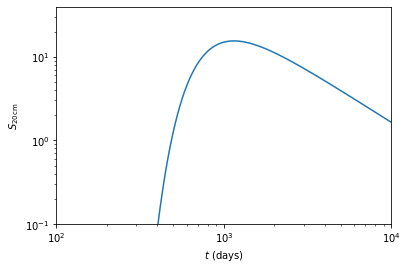

In [4]:
plt.plot(tlist, St)
plt.yscale("log")
plt.xscale("log")
plt.xlim(10**2,10**4)
plt.ylim(10**-1,10**1.6)
plt.ylabel("$S_\mathrm{20cm}$")
plt.xlabel("$t$ (days)")

Now we want to know the timescale the supernova remains with $X\%$ of its peak luminosity.

In [5]:
#
p = 0.20
def p_within_peak(p):
    #locate peak of SN curve
    ind_peak = np.argmax(St)
    Speak = St[ind_peak]
    
    #determine flux density within p% of peak
    Sdrop = Speak*(1-p)
    
    #want to now time of Sdrop before+after peak
    ind_drop_left  = np.argmin(np.abs(St[:ind_peak]-Sdrop))
    ind_drop_right = np.argmin(np.abs(St[ind_peak:]-Sdrop))
    t_left  = tlist[:ind_peak][ind_drop_left]
    t_right = tlist[ind_peak:][ind_drop_right]
    
    #t in days; return in years
    return (t_right-t_left)*(1/365.25)

In [6]:
for p in np.arange(0,1.1,0.1):
    print("Time within %.f%% of peak luminosity: %.2f yr" % (int(p*100), p_within_peak(p)))

Time within 0% of peak luminosity: 0.00 yr
Time within 10% of peak luminosity: 1.71 yr
Time within 20% of peak luminosity: 2.63 yr
Time within 30% of peak luminosity: 3.56 yr
Time within 40% of peak luminosity: 4.61 yr
Time within 50% of peak luminosity: 5.90 yr
Time within 60% of peak luminosity: 7.65 yr
Time within 70% of peak luminosity: 10.29 yr
Time within 80% of peak luminosity: 15.04 yr
Time within 90% of peak luminosity: 27.34 yr
Time within 100% of peak luminosity: 136.62 yr
